### Leaky Integrate and Fire Neuron

\begin{equation}
V_{n+1}=\begin{cases}
V_n + \frac{\Delta t}{C_m}(-g_{leak}(V_n-V_{rest})+I_{input}(t_n))& V_n < V_{thr}\\
V_{spike}&V_{thr} \leq V_n < V_{spike}\\
V_{rest}&V_{spike}  \leq V_{n}\end{cases}
\end{equation}

In [1]:
def leakyIntegrateAndFire(I_input, C_m, g_leak, V_rest, V_thr, V_spike, step, duration):
    # Initialization
    t_max = int(duration / step)
    V = np.array([V_rest] * t_max)
    T = np.linspace(0, t_max - 1, t_max).astype('int')

    # Iteration
    for t in T[1:]:
        if V[t-1] < V_thr:
            V[t] = V[t-1] + (step / C_m) * (-g_leak * (V[t-1] - V_rest) + I_input[t-1])
        elif V_thr <= V[t-1] < V_spike:
            V[t] = V_spike
        elif V_spike <= V[t-1]:
            V[t] = V_rest

    return V, T * step

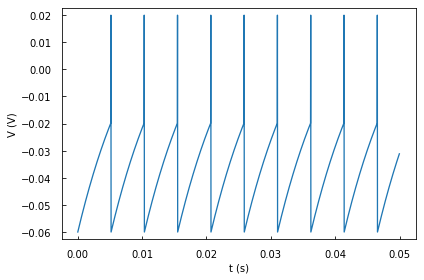

In [4]:
import numpy as np
import matplotlib.pyplot as plt

example = {
    "C_m" : 0.000001,
    "g_leak" : 0.0001,
    "V_rest" : -0.06,
    "V_thr" : -0.02,
    "V_spike" : 0.02,
    "duration" : 0.05,
    "step" : 0.000025,
    "I_input" : [0.00002]*int(0.05 / 0.000025)
}
example["I_input"] = [0.00001] * int(0.05 / 0.000025)
V, t = leakyIntegrateAndFire(**example)

ax = plt.axes()
ax.tick_params(axis='both', which='major', pad=10, labelsize=10,
               direction='in') 
plt.xlim(-0.0025, 0.0525) 
plt.ylim(-0.0625, 0.0225)

plt.plot(t, V, linewidth=1.3)

plt.xlabel('t (s)', fontsize=10)
plt.ylabel('V (V)', fontsize=10)

plt.tight_layout()